# Initial data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set()
import gc

In [2]:
%%time
df = pd.read_parquet('../data/interim/sample2m.parquet')

CPU times: user 3.4 s, sys: 795 ms, total: 4.2 s
Wall time: 2.85 s


In [3]:
df.dtypes

hashtags                                      object
present_media                                 object
present_links                                 object
present_domains                               object
tweet_type                                  category
language                                    category
tweet_timestamp                       datetime64[ns]
engaged_with_user_id                          object
engaged_with_user_follower_count               int64
engaged_with_user_following_count              int64
engaged_with_user_is_verified                   bool
engaged_with_user_account_creation    datetime64[ns]
engaging_user_id                              object
engaging_user_follower_count                   int64
engaging_user_following_count                  int64
engaging_user_is_verified                       bool
engaging_user_account_creation        datetime64[ns]
engagee_follows_engager                         bool
TARGET_reply                                  

## Target columns

In [14]:
target_columns = ['TARGET_reply', 'TARGET_retweet','TARGET_retweet_with_comment', 'TARGET_like']

In [15]:
df[target_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241793 entries, 0 to 2241792
Data columns (total 4 columns):
 #   Column                       Dtype
---  ------                       -----
 0   TARGET_reply                 int64
 1   TARGET_retweet               int64
 2   TARGET_retweet_with_comment  int64
 3   TARGET_like                  int64
dtypes: int64(4)
memory usage: 68.4 MB


Positive and negative interactions are balanced

In [17]:
df[target_columns].sum(axis=1).apply(lambda x: x > 0).value_counts(normalize=True)

False    0.502247
True     0.497753
dtype: float64

The different kinds of positive interactions are really unbalanced

In [18]:
for col in target_columns:
    print(col)
    print(df[col].value_counts(normalize=True)*100)

TARGET_reply
0    97.085815
1     2.914185
Name: TARGET_reply, dtype: float64
TARGET_retweet
0    91.237371
1     8.762629
Name: TARGET_retweet, dtype: float64
TARGET_retweet_with_comment
0    99.303192
1     0.696808
Name: TARGET_retweet_with_comment, dtype: float64
TARGET_like
0    60.261898
1    39.738102
Name: TARGET_like, dtype: float64


## Feature columns

In [21]:
feature_columns = [c for c in df.columns if c not in target_columns]

In [22]:
df[feature_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241793 entries, 0 to 2241792
Data columns (total 18 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   hashtags                            object        
 1   present_media                       object        
 2   present_links                       object        
 3   present_domains                     object        
 4   tweet_type                          category      
 5   language                            category      
 6   tweet_timestamp                     datetime64[ns]
 7   engaged_with_user_id                object        
 8   engaged_with_user_follower_count    int64         
 9   engaged_with_user_following_count   int64         
 10  engaged_with_user_is_verified       bool          
 11  engaged_with_user_account_creation  datetime64[ns]
 12  engaging_user_id                    object        
 13  engaging_user_follower_count        int64 

### Tweet type

We should be seeing 'Reply' too, but nothing appears

In [23]:
df['tweet_type'].value_counts(normalize=True)

TopLevel    0.591903
Retweet     0.326728
Quote       0.081369
Name: tweet_type, dtype: float64

### Engaging user following count

<AxesSubplot:>

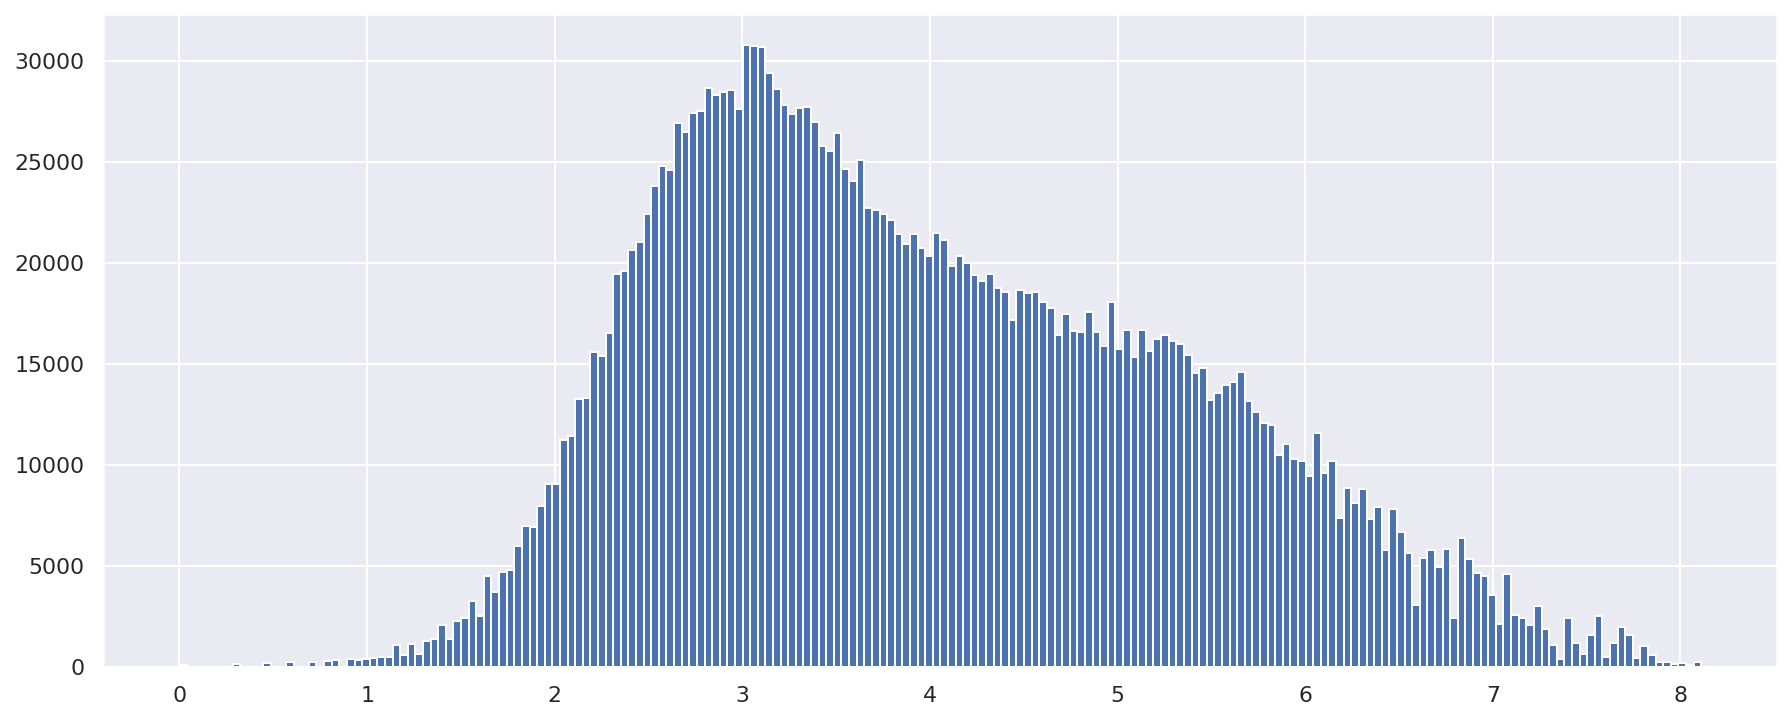

In [24]:
df['engaged_with_user_follower_count'].apply(np.log10).hist(bins=200, figsize=(15, 6))